# Extract information and make fancier plots

Now that we understand basic Pandas IO operations, and basic Python plotting functions, let's do a little flexing. 

**Notebook goals**:
- Extract the max and min electrical loads per day in the Feb-2021 dataset created in module 1-1. Pandas' groupby() function provides a pretty simple way to do this. 
- Coplot the max and min February electrical loads. The two datasets will be distinguished from each other on the same plot by color and by label. 
- Plot the max and min February electrical loads as histograms to get an idea of any statistical significance the data may hold
- Describe the max and min February electrical load dispersions using Pandas' describe()

Bonus goal: use Matplotlib to export more figures into a single pdf file set. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# update plot defaults:
plt.rcParams.update(
    {"font.size": 8, 
     "figure.figsize": (6,4),
    "lines.linewidth": 3})

In [2]:
# read processed Feb-2021 file:
data = pd.read_excel(
    "data/ercot-subset-feb-2021.xlsx",
    index_col=[0],
    )

# display:
data.head()

,houston_area,total
day_and_hour,,
2021-02-01 00:00:00,9994.165132,36054.972726
2021-02-01 01:00:00,9917.547316,35849.824448
2021-02-01 02:00:00,9937.516441,36087.231405
2021-02-01 03:00:00,10077.935922,36801.227362
2021-02-01 04:00:00,10430.960088,38346.436586


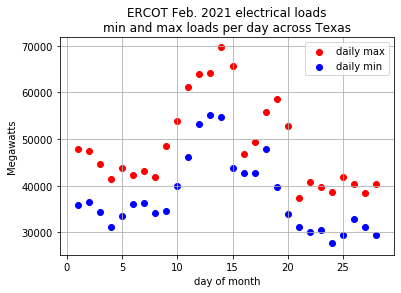

In [3]:
# get the min and max loads per day:
daily_max = data.groupby(data.index.day).max()
daily_min = data.groupby(data.index.day).min()

# plot:
fig1 = plt.figure()
plt.title("""ERCOT Feb. 2021 electrical loads
min and max loads per day across Texas""")
plt.scatter(
    daily_max.index,
    daily_max.total,
    color="red",
    label="daily max",
    )
plt.scatter(
    daily_min.index,
    daily_min.total,
    color="blue",
    label="daily min",
    )
plt.xlabel("day of month")
plt.ylabel("Megawatts")
plt.legend()
plt.grid()

Let's look at this data in histogram format.

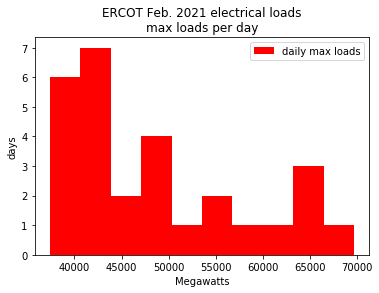

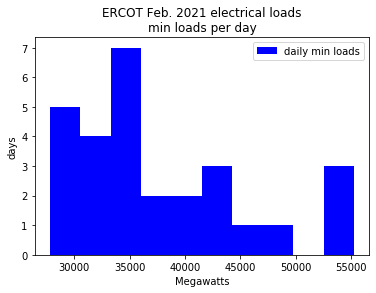

In [4]:
fig2 = plt.figure()
plt.title("""ERCOT Feb. 2021 electrical loads
max loads per day""")
plt.hist(
    daily_max.total,
    color="red",
    label="daily max loads",
    )
plt.xlabel("Megawatts")
plt.ylabel("days")
plt.legend()

fig3 = plt.figure()
plt.title("""ERCOT Feb. 2021 electrical loads
min loads per day""")
plt.hist(
    daily_min.total,
    color="blue",
    label="daily min loads",
    )
plt.xlabel("Megawatts")
plt.ylabel("days")
plt.legend()

In [5]:
# create pdf:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("ercot-feb-2021-plots.pdf")

# save all figures:
for fig in [fig1, fig2, fig3]:
    pdf.savefig(fig)

# close pdf:
pdf.close()

Let's get the statistical measurements for this dispersion.

In [6]:
feb_max_stats = daily_max.describe()

# display:
feb_max_stats.round(2)

,houston_area,total
count,28.00,28.00
mean,12214.36,48598.45
std,1627.16,9491.44
min,9233.90,37378.24
25%,11039.28,41288.91
50%,12151.84,45750.99
75%,12881.03,54415.72
max,15692.09,69692.49
